In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.pipeline import Pipeline



In [3]:
df = pd.read_csv("orders_export_1.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (52,68,71) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_mod = df.copy()

In [5]:
df_mod['Created at'] = pd.to_datetime(df_mod['Created at']).dt.date
df_warehouse = df_mod[df_mod['Lineitem name'].str.contains(pat = 'warehouse', case = False)]
df_warehouse['Lineitem name'].value_counts()
df2 = df_mod[~df_mod['Lineitem name'].isin(df_warehouse['Lineitem name'])]
df2['product_nocol'] = df2['Lineitem name'].str.replace(r'\s*-\s*[a-zA-Z\s]*$', '', regex=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
colors_to_remove = [
    'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet',
    'brown', 'black', 'white', 'gray', 'pink', 'purple', 'beige', 'cyan',
    'magenta', 'turquoise', 'gold', 'silver', 'olive', 'maroon', 'navy',
    'teal', 'coral', 'lavender', 'khaki', 'chartreuse', 'peru',
    'thistle', 'sienna', 'plum', 'crimson',
    'mint', 'sky blue', 'rose', 'russet', 'aquamarine', 'auburn', 'cerulean',
    'mauve','viridian', 'saffron',
    'burnt sienna', 'capri', 'electric blue', 'lime', 'taupe', 'umber',
    'fuchsia', 'gainsboro', 'khaki','peach',
    'thistle', 'turquoise', 'violet', 'burlywood', 'cadet blue', 'dark red',
    'deep pink', 'firebrick', 'goldenrod', 'lime green', 'medium orchid',
    'medium violet red', 'olive drab', 'orange red', 'orchid', 'pale green',
    'pale turquoise', 'pale violet red', 'peru', 'powder blue', 'rosy brown',
    'royal blue', 'saddle brown', 'sea green', 'sienna', 'slate blue', 'spring green',
    'steel blue', 'tan', 'thistle', 'tomato', 'turquoise', 'violet', 'yellow green',
    'blanched almond', 'dark blue', 'dark cyan', 'dark goldenrod', 'dark gray',
    'dark green', 'dark khaki', 'dark magenta', 'dark olive green', 'dark orange',
    'dark orchid', 'dark red', 'dark salmon', 'dark sea green', 'dark slate blue',
    'dark turquoise', 'dark violet', 'deep pink', 'deep sky blue', 'dim gray',
    'dodger blue', 'firebrick', 'floral white', 'forest green', 'gainsboro',
    'ghost white', 'gold', 'goldenrod', 'gray', 'green', 'green yellow', 'honeydew',
    'hot pink', 'indian red', 'ivory', 'khaki', 'lavender', 'lavender blush', 'lawn green',
    'lemon chiffon', 'light blue', 'light coral', 'light cyan', 'light goldenrod',
    'light goldenrod yellow', 'light gray', 'light green', 'light pink', 'light salmon',
    'light sea green', 'light sky blue', 'light slate gray', 'light steel blue',
    'light yellow', 'lime green', 'linen', 'magenta', 'maroon', 'medium aquamarine',
    'medium blue', 'medium orchid', 'medium purple', 'medium sea green', 'medium slate blue',
    'medium spring green', 'medium turquoise', 'medium violet red', 'midnight blue',
    'mint cream', 'misty rose', 'moccasin', 'navajo white', 'navy', 'old lace',
    'olive', 'olive drab', 'orange', 'orange red', 'orchid', 'pale goldenrod',
    'pale green', 'pale turquoise', 'pale violet red', 'papaya whip', 'peach puff',
    'peru', 'pink', 'plum', 'powder blue', 'purple', 'red', 'rosy brown', 'royal blue',
    'saddle brown', 'salmon', 'sandy brown', 'sea green', 'seashell', 'sienna',
    'silver', 'sky blue', 'slate blue', 'slate gray', 'snow', 'spring green', 'steel blue',
    'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'white', 'white smoke',
    'yellow', 'yellow green', 'white'
]


In [7]:
def extract_color_phrase_from_lineitem(lineitem_name, colors_to_remove):
    # Create a pattern that matches any of the colors_to_remove, longest first.
    # This way "navy blue" will match before "blue".
    pattern = r'\b(?:' + '|'.join(sorted(colors_to_remove, key=len, reverse=True)) + r')\b'
    match = re.search(pattern, lineitem_name.lower())
    
    if match:
        # If a color phrase is found, extract the full phrase.
        color_phrase = match.group(0)
        # Remove the color phrase from the lineitem name.
        lineitem_name = re.sub(pattern, '', lineitem_name, count=1).strip()
        # Return the modified item name and the color phrase.
        return lineitem_name, color_phrase
    else:
        # If no color is found, return the name as-is and None for color.
        return lineitem_name, None

# Applying the modified function and create two new columns for 'product_nocol' and 'item_color'
df2[['product_nocol', 'item_color']] = df2.apply(lambda row: pd.Series(extract_color_phrase_from_lineitem(row['Lineitem name'], colors_to_remove)), axis=1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
df2.to_csv('final_data.csv', index=False)


In [9]:
df2

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment ID,Payment Terms Name,Next Payment Due At,Payment References,product_nocol,item_color
0,#20000,ablair6510@gmail.com,paid,12/21/2023 9:39,unfulfilled,NaN,no,USD,23.0,4.75,...,NaN,NaN,Ohio,Ohio,rnMd0Y3hHWLg2lcuaaPxzb3Oh,NaN,NaN,rnMd0Y3hHWLg2lcuaaPxzb3Oh + #20000.2,Go Ask Your Dad Club Mug,None
1,#20000,ablair6510@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,These Are The Good Ole Days 11oz Brown Mug,brown
2,#19999,rylie.schlottmann@gmail.com,paid,12/21/2023 7:54,fulfilled,12/21/2023 9:23,no,USD,26.1,4.97,...,NaN,NaN,Oregon,Oregon,r7lSfAOnFVpABA0KgxK9HX0Z3,NaN,NaN,r7lSfAOnFVpABA0KgxK9HX0Z3 + #19999.2,Silicone Straw Cup with Lid - Primary Color Ed...,royal blue
3,#19999,rylie.schlottmann@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Silicone Straw Cup with Lid - Sunshine Yellow,yellow
4,#19998,firechick16@hotmail.com,paid,12/20/2023 20:58,fulfilled,12/21/2023 9:32,yes,USD,28.0,4.90,...,NaN,NaN,Massachusetts,Massachusetts,rhWNZA6chPcQDs95zlD1IDUUM,NaN,NaN,rhWNZA6chPcQDs95zlD1IDUUM + #19998.2,Tator Tot Ringer 5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27585,#6605,kara.lewis@me.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Be Genuine | Unisex - M / Natural,None
27586,#6604,Grow.Wild.andco@gmail.com,paid,5/6/2021 6:24,fulfilled,5/6/2021 10:41,yes,USD,44.8,4.49,...,NaN,NaN,Nevada,Nevada,c20318427873454.1,NaN,NaN,c20318427873454.1,Raise Them Kind | Unisex - M / Peach,peach
27587,#6603,kbrowning2teach@gmail.com,paid,5/6/2021 5:41,fulfilled,5/6/2021 10:41,yes,USD,55.0,5.20,...,NaN,NaN,Connecticut,Connecticut,c20318215766190.1,NaN,NaN,c20318215766190.1,Love Like A Mother | Crew Neck Pullover - Smal...,None
27588,#6602,rlbriggs243@gmail.com,paid,5/5/2021 21:35,fulfilled,5/6/2021 10:41,yes,USD,55.0,5.20,...,NaN,NaN,Colorado,Colorado,c20315302166702.1,NaN,NaN,c20315302166702.1,Love Like A Mother | Crew Neck Pullover - Smal...,None


### Analysis 

For a recommendation system, we need to maintain product-level detail while still understanding customer behavior.

Here's how we could handle this:

- Preserve Product-Level Data: Instead of aggregating product data, we preserve each line item entry so that product-level detail is maintained for recommendations.

- Customer-Level Features: We create customer-level features such as total spend, frequency of orders, and recency separately and join these to the line item data.

- Customer Aggregates: Create aggregates that summarize customer behavior without losing product details. For example, we could compute the total number of orders, total spend, and the recency of their last order and then attach this information to each line item.

- Combining Datasets: Create two datasets - one that maintains every line item per order and another that summarizes customer behavior. We use the line item dataset for product recommendation and the summary dataset for customer segmentation.


The updated aggregation now incorporates a deeper level of detail while maintaining the customer-level and transaction-level datasets. Here are the key components:

- Financial Totals: We've aggregated total Subtotal, Shipping, Taxes, and Total spent per customer.
- Recency: Calculated as the number of days from the most recent purchase to a reference date, ensuring that we only have NaN values when the Paid at date is missing (as seen in one entry).
- Frequency: The total number of transactions (orders) per customer.
- Total Items Purchased: The sum of all items bought per customer.
- Unique Products: The count of different product types purchased by each customer.
- Categorical Features: Accepts Marketing, Billing Province Name, and Shipping Province Name, where we've used the mode to summarize these attributes.

This hybrid approach allows us to retain detailed transaction-level information for product recommendation algorithms while using aggregated customer-level data for segmentation and other marketing strategies.

We successfully corrected the NaN issue in the Recency and Frequency calculations, which were affected by missing Paid at dates.

In [10]:
data = df2.copy()

In [11]:
# Convert 'Paid at' to datetime
data['Paid at'] = pd.to_datetime(data['Paid at'], errors='coerce')
# Ensure that financial columns are numeric
financial_cols = ['Subtotal', 'Shipping', 'Taxes', 'Total']
for col in financial_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# Verify the data types and look for any object types that should be numeric
print(data.dtypes)

Name                           object
Email                          object
Financial Status               object
Paid at                datetime64[ns]
Fulfillment Status             object
                            ...      
Payment Terms Name            float64
Next Payment Due At           float64
Payment References             object
product_nocol                  object
item_color                     object
Length: 81, dtype: object


In [12]:
# Revisiting and correcting the aggregation while ensuring deep-level aggregation for the hybrid approach.

# Correcting the aggregation for Recency and Frequency
customer_aggregates = data.groupby('Email').agg({
    'Subtotal': 'sum',
    'Shipping': 'sum',
    'Taxes': 'sum',
    'Total': 'sum',
    'Paid at': 'max'  # This captures the most recent purchase date
}).reset_index()

# Convert 'Paid at' to datetime if not already and calculate 'Recency'
customer_aggregates['Most Recent Purchase'] = pd.to_datetime(customer_aggregates['Paid at'], errors='coerce')
reference_date = customer_aggregates['Most Recent Purchase'].max()
customer_aggregates['Recency'] = (reference_date - customer_aggregates['Most Recent Purchase']).dt.days

# Calculating the frequency of orders for each customer
customer_aggregates['Frequency'] = data.groupby('Email').size().values

# Adding additional aggregations such as the total items purchased and unique products
customer_aggregates['Total Items Purchased'] = data.groupby('Email')['Lineitem quantity'].sum().values
customer_aggregates['Unique Products'] = data.groupby('Email')['product_nocol'].nunique().values

# Aggregating categorical columns by taking the mode for marketing and location data
customer_categories = data.groupby('Email').agg({
    'Accepts Marketing': lambda x: x.mode()[0] if not x.mode().empty else "Unknown",
    'Billing Province Name': lambda x: x.mode()[0] if not x.mode().empty else "Unknown",
    'Shipping Province Name': lambda x: x.mode()[0] if not x.mode().empty else "Unknown"
}).reset_index()

# Combining the financial aggregates with the categorical data
customer_aggregates = pd.merge(customer_aggregates, customer_categories, on='Email', how='left')

# Display the updated customer aggregates to check for NaN issues
customer_aggregates.head()


,Email,Subtotal,Shipping,Taxes,Total,Paid at,Most Recent Purchase,Recency,Frequency,Total Items Purchased,Unique Products,Accepts Marketing,Billing Province Name,Shipping Province Name
0,09.aguirre.d@gmail.com,77.0,0.00,0.00,77.00,2023-11-24 16:15:00,2023-11-24 16:15:00,26.0,3,3,3,yes,California,California
1,0f8d0d0aa0df202311@client.choose.rocks,10.0,0.00,0.00,10.00,NaT,NaT,NaN,1,1,1,no,Virginia,Virginia
2,13leahhazel@gmail.com,140.5,4.97,0.00,145.47,2023-01-22 19:15:00,2023-01-22 19:15:00,332.0,4,7,4,yes,California,California
3,154marine@gmail.com,28.0,0.00,3.27,31.27,2023-11-14 16:22:00,2023-11-14 16:22:00,36.0,1,1,1,yes,Unknown,Unknown
4,16jings@gmail.com,300.6,0.00,32.80,333.40,2023-11-30 16:24:00,2023-11-30 16:24:00,20.0,18,18,18,yes,Unknown,Unknown


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import numpy as np

# Assuming customer_aggregates is your DataFrame and it's loaded correctly
numerical_cols = ['Subtotal', 'Shipping', 'Taxes', 'Total', 'Recency', 'Frequency', 'Total Items Purchased', 'Unique Products']
categorical_cols = ['Accepts Marketing', 'Billing Province Name', 'Shipping Province Name']

# Transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing any NaNs with the mean of the column
    ('scaler', StandardScaler())  # Standard scaling
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit-Transform the data
X_processed = preprocessor.fit_transform(customer_aggregates[numerical_cols + categorical_cols])

# Handling any infinites by replacing them with NaNs and then imputing those
X_processed = np.nan_to_num(X_processed, nan=np.nan)
imputer = SimpleImputer(strategy='mean')
X_processed = imputer.fit_transform(X_processed)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_processed)

# Results
clusters = kmeans.labels_
print("Cluster centers:", kmeans.cluster_centers_)


Cluster centers: [[-1.85990546e-01 -3.44420679e-01 -5.66839200e-02 -2.01156405e-01
  -6.45296497e-01 -2.22943858e-01 -1.99540688e-01 -2.30005994e-01
   2.52192319e-01  7.47807681e-01  9.07166616e-03  9.07166616e-04
   1.20955549e-03  9.37405503e-03  6.04777744e-03  9.07166616e-04
   3.02388872e-04  0.00000000e+00  0.00000000e+00  2.11672210e-03
   7.62019958e-02  0.00000000e+00  2.50982764e-02  9.37405503e-03
   1.20955549e-03  3.02388872e-04  1.60266102e-02  1.54218325e-02
   3.02388872e-04  1.20955549e-03  4.53583308e-03  5.71514968e-02
   1.08859994e-02  1.23979438e-02  0.00000000e+00  3.93105534e-03
   8.16449955e-03  3.32627759e-03  5.14061083e-03  0.00000000e+00
   1.54218325e-02  2.93317206e-02  2.08648322e-02  2.32839432e-02
   0.00000000e+00  5.32204415e-02  2.72149985e-03  2.41911098e-03
   1.81433323e-03  3.32627759e-03  1.66313880e-02  3.62866647e-03
   3.02388872e-04  4.20320532e-02  3.02388872e-04  2.08648322e-02
   1.20955549e-03  0.00000000e+00  2.08648322e-02  5.745388

The average silhouette_score is : 0.15706823254437757


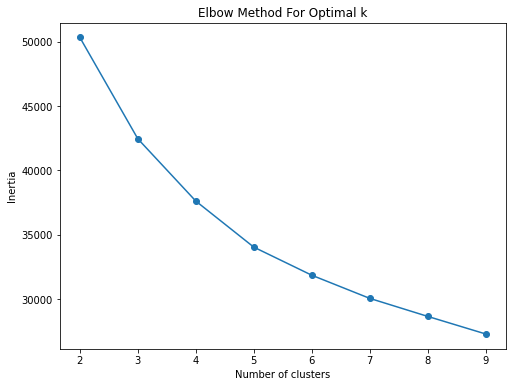

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_processed, clusters)
print("The average silhouette_score is :", silhouette_avg)


# Inertia plot / Elbow method
inertia = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


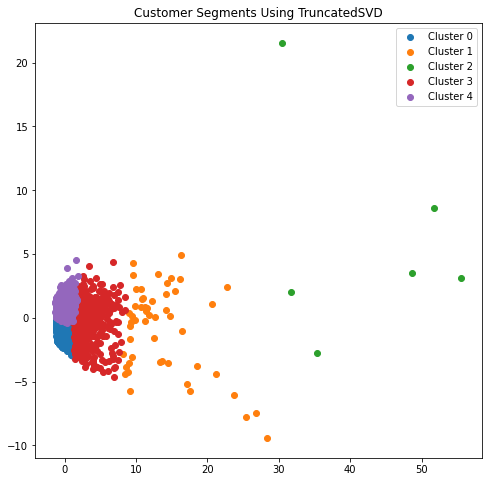

In [18]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Using TruncatedSVD for dimensionality reduction on sparse data
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_processed)

# Plotting the results
plt.figure(figsize=(8, 8))
for i in range(np.unique(clusters).max() + 1):
    plt.scatter(X_svd[clusters == i, 0], X_svd[clusters == i, 1], label=f'Cluster {i}')
plt.title('Customer Segments Using TruncatedSVD')
plt.legend()
plt.show()


Hierarchical Clustering using 3 clusters

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Convert the sparse matrix to a dense array
X_dense = X_processed.toarray()

# Applying hierarchical clustering to the dense array
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(X_dense)

# Calculating silhouette score for hierarchical clustering
silhouette_avg_hierarchical = silhouette_score(X_dense, clusters_hierarchical)
print(f"The average silhouette_score for hierarchical clustering is: {silhouette_avg_hierarchical}")


The average silhouette_score for hierarchical clustering is: 0.7498218901507259


In [20]:
# Assuming 'clusters_hierarchical' contains your cluster labels
customer_aggregates['Cluster'] = clusters_hierarchical

# Calculate mean or median for each numerical attribute for each cluster
cluster_profiles = customer_aggregates.groupby('Cluster').agg(['mean', 'median'])

# For categorical data, we use the mode or count distinct occurrences
categorical_aggregates = customer_aggregates.groupby('Cluster')[categorical_cols].agg(lambda x: x.value_counts().index[0])

# Combine numerical and categorical profiles
cluster_profiles = pd.concat([cluster_profiles, categorical_aggregates], axis=1)


In [21]:
cluster_profiles.to_clipboard()

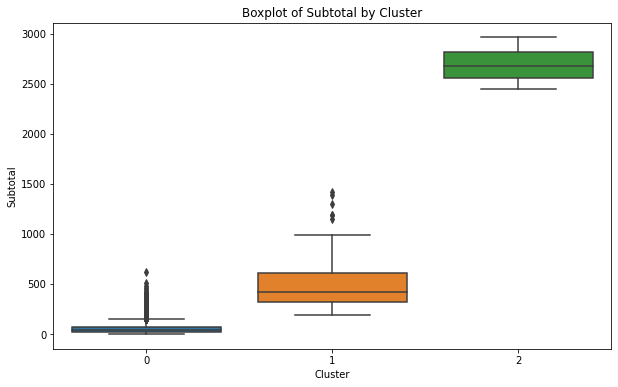

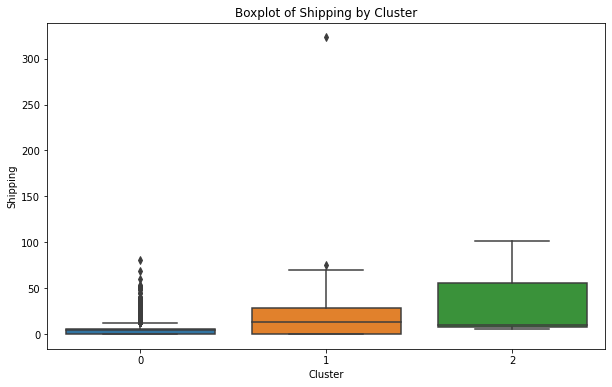

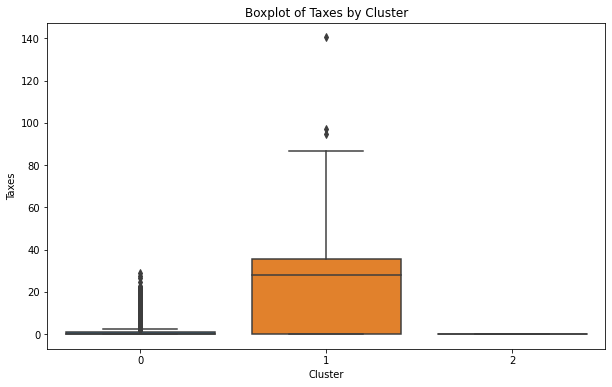

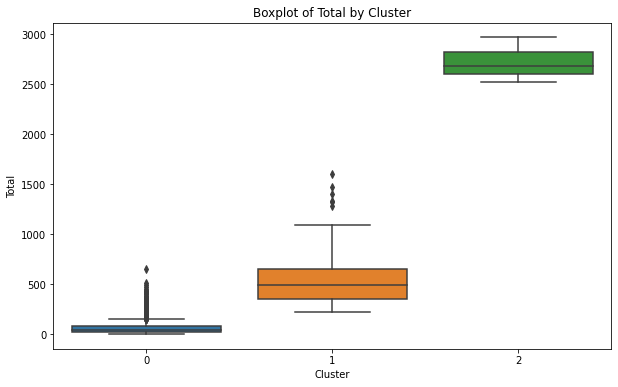

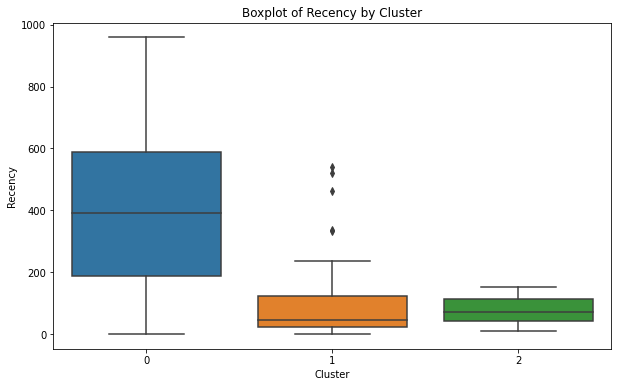

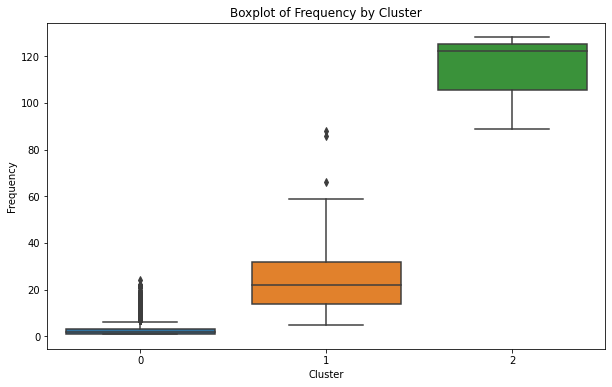

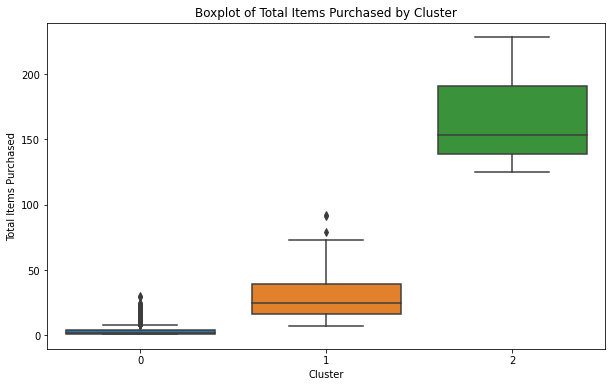

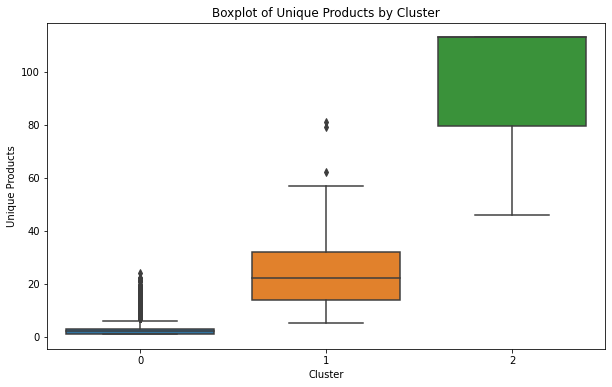

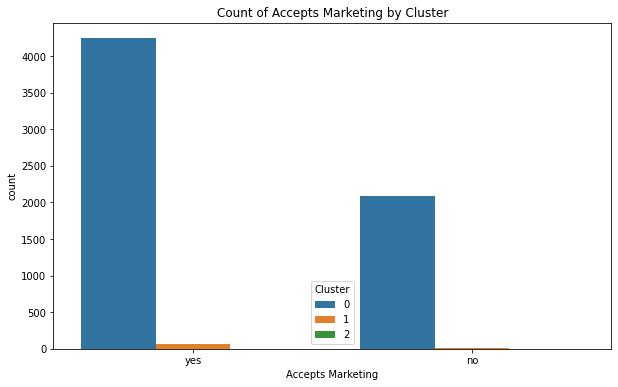

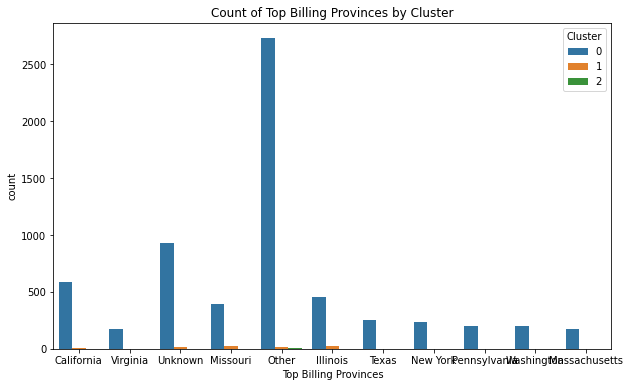

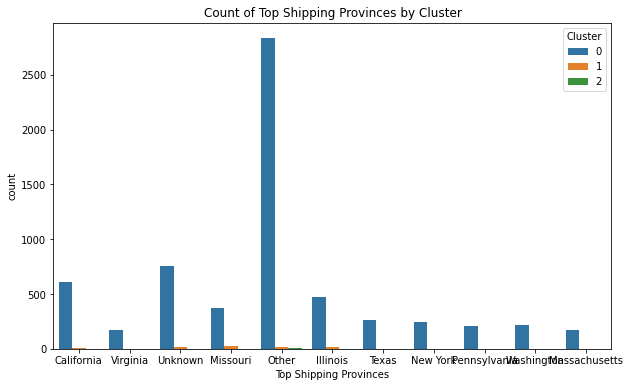

            Subtotal            Shipping             Taxes         \
                mean   median       mean median       mean median   
Cluster                                                             
0          54.637737    36.00   4.196527   4.37   1.379597   0.00   
1         514.570674   417.90  20.786292  13.55  26.797528  27.96   
2        2695.023333  2672.25  38.533333   9.46   0.000000   0.00   

               Total              Recency          Frequency         \
                mean   median        mean median        mean median   
Cluster                                                               
0          59.847678    41.95  406.241513  390.0    2.740641    2.0   
1         561.258539   486.65   90.292135   46.0   25.696629   22.0   
2        2724.486667  2681.71   78.000000   72.0  113.000000  122.0   

        Total Items Purchased        Unique Products         
                         mean median            mean median  
Cluster                           

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'customer_aggregates' includes cluster labels.
# Make sure 'transactional_data' refers to the dataset with individual transactions and cluster labels.

# Analyzing numerical columns
numerical_cols = ['Subtotal', 'Shipping', 'Taxes','Total','Recency','Frequency', 'Total Items Purchased','Unique Products']  

# Create boxplots for each numerical feature across clusters
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=customer_aggregates)
    plt.title(f'Boxplot of {col} by Cluster')
    plt.show()

# Assuming 'N' is the number of top categories we want to focus on
N = 10
top_billing_provinces = customer_aggregates['Billing Province Name'].value_counts().index[:N]
top_shipping_provinces = customer_aggregates['Shipping Province Name'].value_counts().index[:N]

# Creating a new column where all non-top categories are labeled as 'Other'
customer_aggregates['Top Billing Provinces'] = customer_aggregates['Billing Province Name'].apply(lambda x: x if x in top_billing_provinces else 'Other')
customer_aggregates['Top Shipping Provinces'] = customer_aggregates['Shipping Province Name'].apply(lambda x: x if x in top_shipping_provinces else 'Other')


# Analyzing categorical columns
categorical_cols = ['Accepts Marketing', 'Top Billing Provinces','Top Shipping Provinces']  

# Create count plots for each categorical feature across clusters
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Cluster', data=customer_aggregates)
    plt.title(f'Count of {col} by Cluster')
    plt.show()

# Calculate and print the mean and median for numerical features for each cluster
cluster_summary_stats = customer_aggregates.groupby('Cluster')[numerical_cols].agg(['mean', 'median'])
print(cluster_summary_stats)



In [23]:
customer_aggregates

,Email,Subtotal,Shipping,Taxes,Total,Paid at,Most Recent Purchase,Recency,Frequency,Total Items Purchased,Unique Products,Accepts Marketing,Billing Province Name,Shipping Province Name,Cluster,Top Billing Provinces,Top Shipping Provinces
0,09.aguirre.d@gmail.com,77.00,0.00,0.00,77.00,2023-11-24 16:15:00,2023-11-24 16:15:00,26.0,3,3,3,yes,California,California,0,California,California
1,0f8d0d0aa0df202311@client.choose.rocks,10.00,0.00,0.00,10.00,NaT,NaT,NaN,1,1,1,no,Virginia,Virginia,0,Virginia,Virginia
2,13leahhazel@gmail.com,140.50,4.97,0.00,145.47,2023-01-22 19:15:00,2023-01-22 19:15:00,332.0,4,7,4,yes,California,California,0,California,California
3,154marine@gmail.com,28.00,0.00,3.27,31.27,2023-11-14 16:22:00,2023-11-14 16:22:00,36.0,1,1,1,yes,Unknown,Unknown,0,Unknown,Unknown
4,16jings@gmail.com,300.60,0.00,32.80,333.40,2023-11-30 16:24:00,2023-11-30 16:24:00,20.0,18,18,18,yes,Unknown,Unknown,1,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,zoeymartinez.e@gmail.com,55.00,4.46,0.00,59.46,2021-05-07 10:17:00,2021-05-07 10:17:00,957.0,2,2,2,no,Missouri,Missouri,0,Missouri,Missouri
6419,zopi.kristjanson@gmail.com,30.00,0.00,0.00,30.00,2021-11-30 10:00:00,2021-11-30 10:00:00,750.0,1,3,1,yes,New York,New York,0,New York,New York
6420,zsiglow05@gmail.com,10.00,4.06,0.00,14.06,2021-08-11 11:51:00,2021-08-11 11:51:00,861.0,1,1,1,yes,Michigan,Michigan,0,Other,Other
6421,zugddally.alicea@gmail.com,0.00,0.00,0.00,0.00,NaT,NaT,NaN,1,1,1,no,Puerto Rico,Puerto Rico,0,Other,Other


In [24]:

# Merge cluster labels from customer_aggregates to transactional_data on 'Email'
transactional_data = data.merge(
    customer_aggregates[['Email', 'Cluster']], on='Email', how='left'
)

# Now the 'transactional_data' DataFrame will have the 'Cluster' column correctly aligned
# You can now group by 'Cluster' and 'product_nocol' to find top products
top_products_by_cluster = (
    transactional_data.groupby(['Cluster', 'product_nocol'])
    .size()
    .reset_index(name='count')
    .sort_values(['Cluster', 'count'], ascending=[True, False])
    .groupby('Cluster')
    .head(10)
)


In [ ]:
top_products_by_cluster.to_clipboard()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

products = transactional_data['product_nocol'].unique()

# Feature Extraction: Convert product names into TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(products)

# Compute the cosine similarity matrix between products
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on the cosine similarity score
def content_based_recommendations(product_name, cosine_sim=cosine_sim):
    # Get the index of the product that matches the name
    idx = np.where(products == product_name)[0][0]
    
    # Get the pairwsie similarity scores of all products with that product
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the products based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Scores of the 5 most similar products (excluding itself)
    sim_scores = sim_scores[1:6]
    
    # Get the product indices
    product_indices = [i[0] for i in sim_scores]
    
    # Return the top 5 most similar products
    return products[product_indices]

# Testing the recommendation system with a sample product
sample_product = products[24]  # Replace 20 with the index of a product from your dataset
recommended_products = content_based_recommendations(sample_product)
print(f"Because you bought {sample_product}, we recommend:")
print(recommended_products)


Because you bought Tater Tot Hair Clip, we recommend:
['Tater Tot Organic Cotton Baby Onesie - 6mo (3-6)'
 'Tater Tot Organic Cotton Baby Onesie - 3mo (0-3)'
 'Tater Tot Organic Cotton Baby Onesie - 12mo (6-12)' 'Small hair clip'
 'Tater Tot Organic Cotton Baby Onesie - 18mo (12-18)']


Content-Based Filtering (CBF)

The TF-IDF vectorizer is capturing textual similarities, which can often be due to similar words being used, such as "Cocktail Glass" or "The Jenna Knitted Waffle Pullover," resulting in recommendations for different sizes or colors of the same product. To enhance the recommendations, we need to move beyond basic text similarity and incorporate more sophisticated methods that can understand the context and variety of the products. Here are some steps you can take to improve the system:

some ways to tackle - 
Feature Engineering:
Expand the features used for recommendations. Besides the product name, include product categories, tags, or attributes that describe the item.

Collaborative filtering is a method of making automatic predictions about the interests of a user by collecting preferences from many users. This technique assumes that if users A and B have agreed in the past, they will agree in the future about certain items.we’ll focus on building an item-based collaborative filtering system, which measures the similarity between the items that target users rate or interact with and other items.

In [26]:
# Aggregate the data to get total item quantity purchased by each user for each item
user_item_interaction = transactional_data.groupby(['Email', 'Lineitem name'])['Lineitem quantity'].sum().unstack(fill_value=0)

# Convert to a sparse matrix format
from scipy.sparse import csr_matrix
user_item_interaction_sparse = csr_matrix(user_item_interaction.values)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between items
item_similarity = cosine_similarity(user_item_interaction_sparse.T)

# Wrap the similarities in a DataFrame for ease of use
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_interaction.columns, columns=user_item_interaction.columns)


In [28]:
# Function to get recommendations based on the cosine similarity score
def get_item_based_recommendations(item_name, item_similarity_df, items_to_recommend=5):
    # Check if item_name exists in our similarity matrix
    if item_name in item_similarity_df:
        # Get the similarity scores for the item
        sim_scores = item_similarity_df[item_name]
        
        # Sort the scores in descending order
        sim_scores_sorted = sim_scores.sort_values(ascending=False)
        
        # Get the scores for the top N items, excluding the first one (which is the item itself)
        top_items = sim_scores_sorted.iloc[1:items_to_recommend+1].index
        return top_items
    else:
        return f"Item '{item_name}' not found in the dataset."


In [29]:
# Test the recommendation system with an example item
example_item = user_item_interaction.columns[12]  # Replace 10 with the index of an item
recommended_items = get_item_based_recommendations(example_item, item_similarity_df)
print(f"Items similar to '{example_item}' are:\n{recommended_items}")


Items similar to 'Botanica Reef Reed Diffuser' are:
Index(['The Stella Turtleneck in Royal Blue - Small',
       'Bumper Magnet - Take It Easy', 'Botanica Reef Reed Diffuser',
       'Baggu Fanny Pack - Avocado', 'No. 060 Pills Bandana'],
      dtype='object', name='Lineitem name')


Hybrid - Clustering + Filtering 


To incorporate the clustering results into the collaborative filtering system, we will tailor the item similarity calculations within each cluster. This means that the similarity between items will be computed based on interactions from users within the same cluster. The idea is that users within the same cluster will have more similar preferences compared to the general population.

In [30]:
# Create a user-item-cluster interaction matrix
interaction_matrix = transactional_data.groupby(['Cluster', 'Email', 'Lineitem name'])['Lineitem quantity'].sum().unstack(fill_value=0)

# Calculate cosine similarity within each cluster
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

item_similarity_clustered = {}

for cluster in interaction_matrix.index.get_level_values(0).unique():
    matrix = interaction_matrix.xs(cluster, level='Cluster')  # Extract the interaction matrix for this cluster
    sparse_matrix = csr_matrix(matrix.fillna(0).values)  # Convert to sparse matrix format for efficiency
    similarity = cosine_similarity(sparse_matrix.T)  # Calculate cosine similarity between items
    item_similarity_clustered[cluster] = pd.DataFrame(similarity, index=matrix.columns, columns=matrix.columns)

def dynamic_item_recommendations(item_name, n_recommendations=5):
    # Determine the cluster this item belongs to based on maximum interaction
    cluster_series = transactional_data[transactional_data['Lineitem name'] == item_name]['Cluster']
    if not cluster_series.empty:
        most_common_cluster = cluster_series.mode()[0]  # Get the most frequent cluster for this item
        # Get the similarity matrix for this cluster
        if item_name in item_similarity_clustered[most_common_cluster].columns:
            sim_scores = item_similarity_clustered[most_common_cluster][item_name].sort_values(ascending=False)
            top_items = sim_scores.iloc[1:n_recommendations+1].index.tolist()  # Exclude the item itself
            return top_items
        else:
            return f"Item '{item_name}' not found in the similarity matrix for its cluster."
    else:
        return f"Item '{item_name}' not found in the dataset."

# Assuming 'Lineitem name' is the column with product names
products = transactional_data['Lineitem name'].unique().tolist()


Trying both collaborative filtering with and without clustering to check which one is better

In [34]:
# Example usage with product index
product_index = 121
sample_product = products[product_index]  

# Call the recommendation function with the product name
recommended_items = dynamic_item_recommendations(sample_product)
print(f"1st model - Recommended items for '{sample_product}':\n{recommended_items}")

print('-------------------------------------------------------------------------------------')

# Test the recommendation system with an example item
# example_item = user_item_interaction.columns[product_index]  # Replace 10 with the index of an item
recommended_items = get_item_based_recommendations(sample_product, item_similarity_df)
print(f" 2nd model - Items similar to '{sample_product}' are:\n{recommended_items}")


1st model - Recommended items for 'Silicone Straw Cup with Lid - Primary Color Edition - Lilac':
['T-Rex Ponies', 'World Changer in the Making Organic Cotton Baby Bodysuit - 6mo / Natural', 'Hair Clips - Fern + Spice + Burlwood | Set of 3', 'It Takes a Village Adult Retro Ringer T-Shirt - XXL', 'Happy Everything Pullover in Muted Clay - 4T']
-------------------------------------------------------------------------------------
 2nd model - Items similar to 'Silicone Straw Cup with Lid - Primary Color Edition - Lilac' are:
Index(['T-Rex Ponies', 'Cosmos of Everything Tee | Free Shipping - Large',
       'IMPERFECT | Empowered Women Adult T-Shirt - Small', 'Check-Up Notepad',
       'Mini Grandpa Cardigan in Red - 2T'],
      dtype='object', name='Lineitem name')


Both models show promise, but the inclusion of clustering appears to potentially enhance the contextual relevance of the recommendations, which can be critical for user satisfaction and conversion rates in a real-world e-commerce environment.
Recommendations that are contextually relevant (e.g., recommending baby-related products for baby apparel) suggest that clustering might be helping to refine these associations.

- Without Clustering: The recommendations tend to include a variety of items but sometimes appear to lack a clear thematic or functional connection to the query item. This can be seen in the recommendations for "Silicone Straw Cup with Lid - Primary Color Edition - Lilac" and "Josh Baby Boy Cardigan - 12mo," where unrelated items like t-shirts and hair clips are recommended.
- With Clustering: Recommendations seem to exhibit a slightly better thematic alignment, particularly evident in cases like "Mom of the Year Motel Keychain," where related products (mugs, onesies, and keychains) appear. This suggests that within clusters, user preferences may be more homogeneous, leading to more contextually relevant suggestions.